# Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import Data set
salary = pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
X = salary.iloc[:, :-1].values
y = salary.iloc[:, -1].values

In [4]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [5]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## Taking Care of Missing Data

In [6]:
salary.isnull().values.any()

False

In [7]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Two different ways to check for missing data

## Splitting the dataset into Training and Test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [9]:
X_train

array([[ 9.5],
       [ 2. ],
       [ 8.7],
       [ 7.9],
       [ 8.2],
       [ 2.2],
       [ 1.5],
       [ 9. ],
       [ 3. ],
       [ 5.9],
       [ 4.1],
       [ 3.2],
       [ 9.6],
       [ 1.3],
       [ 5.1],
       [ 1.1],
       [ 4.9],
       [10.5],
       [10.3],
       [ 3.7],
       [ 3.2],
       [ 4. ],
       [ 4. ],
       [ 2.9]])

In [10]:
X_test

array([[5.3],
       [7.1],
       [3.9],
       [6. ],
       [4.5],
       [6.8]])

# Training the Simple Linear Regression Model on the Training Set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()            
regressor.fit(X_train, y_train)      #fit Method from the LinearRegression Class

#regression = predicts a continuous value like salary; 
#classification = predicts a category / label

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the Test set results

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
y_pred

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

# Visualising the Training set results

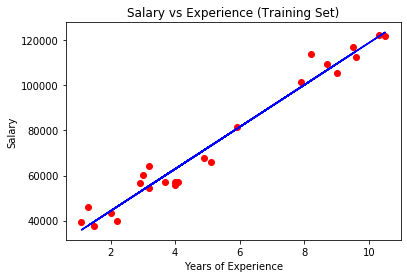

In [14]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')    #salaries predicted in the training set
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results

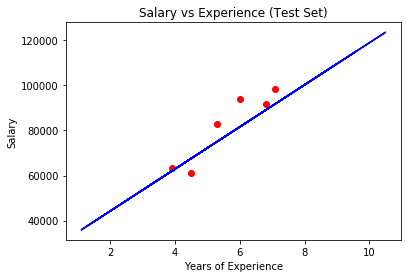

In [15]:
plt.scatter(X_test, y_test, color = 'red')     # real observations
plt.plot(X_train, regressor.predict(X_train), color = 'blue')    #salaries predicted in the training set
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Making a single prediction

The salary of an employee with 12 years of experience

In [16]:
print(regressor.predict([[12]]))

[137605.23485427]


Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 137605,23.

Important note: Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

12→scalar

[12]→1D array

[[12]]→2D array

# Getting the final linear regression equation with the values of the coefficients

In [17]:
print(regressor.coef_)
print(regressor.intercept_)

[9332.94473799]
25609.89799835482


Therefore, the equation of our simple linear regression model is:

### Salary = 25609.90 + 9332.94 × YearsExperience  


# Evaluating the Model Performance

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7616681465472094